# Sınıflandırma Problemleri

# Sonuçlar makaleden farklı olabilir. Çünkü her çalıştırdımızda eksik gözleme atanan değerler değişmektedir.

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,  StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings('ignore')

# Veri Önişleme ve Görselleştirme

## Model 

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

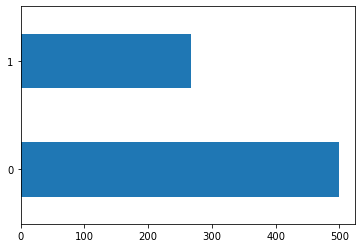

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


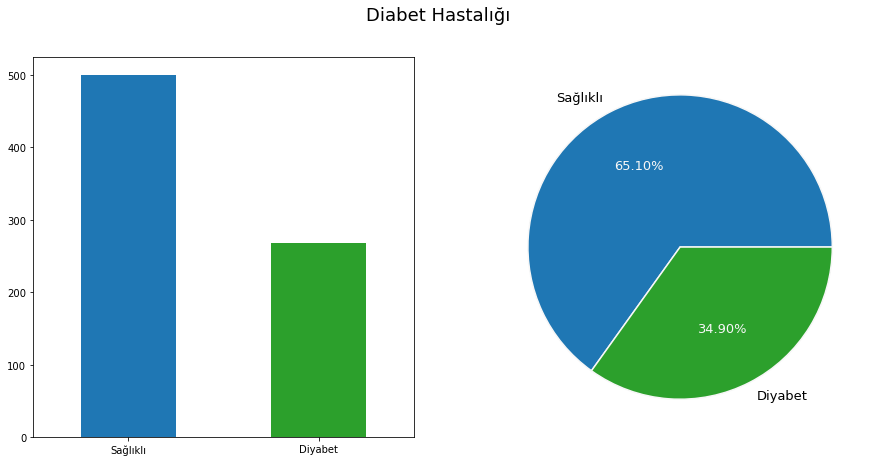

In [7]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabet Hastalığı", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Sağlıklı", "Diyabet"])
_ = df.Outcome.value_counts().plot.pie(labels = ("Sağlıklı", "Diyabet"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

<AxesSubplot:xlabel='BMI', ylabel='Density'>

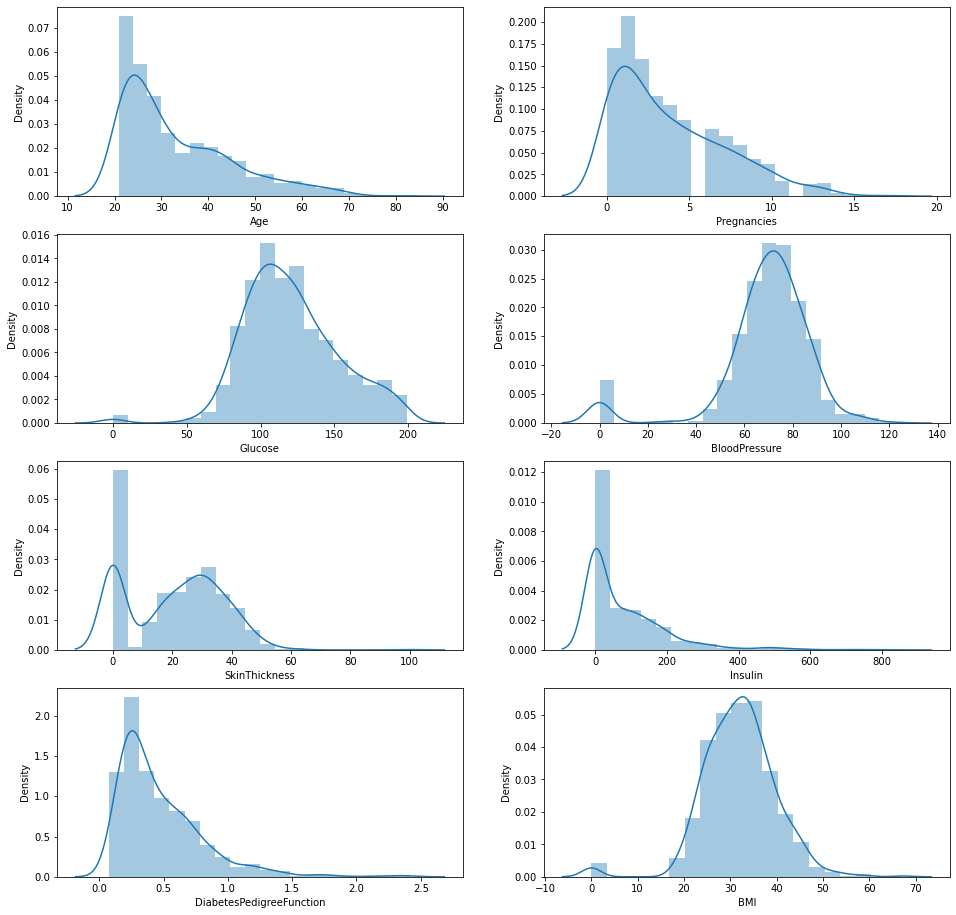

In [8]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [9]:
data=df

# Eksik Gözlemlerin Medyan ve KNN'ye Göre Atanması

In [10]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
df = data.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
!pip install ycimpute

In [13]:
from ycimpute.imputer import knnimput

In [14]:
var_names = list(df)

In [15]:
import numpy as np
n_df = np.array(df)

In [16]:
n_df[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01,       nan, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01,       nan, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01,       nan,       nan, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00],
       [5.000e+00, 1.160e+02, 7.400e+01,       nan,       nan, 2.560e+01,
        2.010e-01, 3.000e+01, 0.000e+00],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01, 1.000e+00],
       [1.000e+01, 1.150e+02,       nan,       nan,       nan, 3.530e+01,
        1.340e-01, 2.900e+01, 0.000e+00],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01

In [17]:
n_df.shape

(768, 9)

In [18]:
dff = knnimput.KNN(k = 5).complete(n_df)

Imputing row 1/768 with 1 missing, elapsed time: 0.123
Imputing row 101/768 with 2 missing, elapsed time: 0.126
Imputing row 201/768 with 1 missing, elapsed time: 0.129
Imputing row 301/768 with 3 missing, elapsed time: 0.131
Imputing row 401/768 with 2 missing, elapsed time: 0.134
Imputing row 501/768 with 0 missing, elapsed time: 0.136
Imputing row 601/768 with 1 missing, elapsed time: 0.139
Imputing row 701/768 with 0 missing, elapsed time: 0.142


In [19]:
dff = pd.DataFrame(dff, columns = var_names)

In [20]:
dff.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,284.230396,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,57.604207,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,33.674139,230.196684,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


<AxesSubplot:xlabel='BMI', ylabel='Density'>

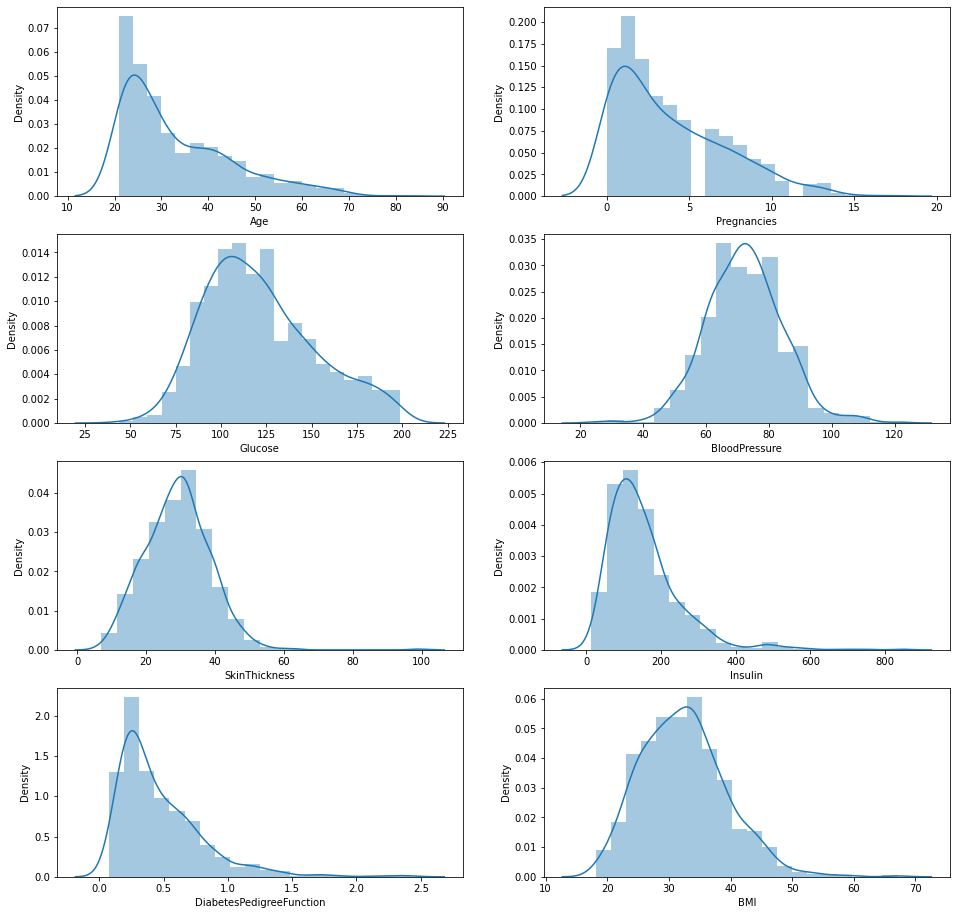

In [22]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dff.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dff.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dff.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dff.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dff.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dff.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dff.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dff.BMI, bins = 20, ax=ax[3,1]) 

In [23]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [24]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [25]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

In [26]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [27]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [28]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [29]:
df=data

<AxesSubplot:xlabel='BMI', ylabel='Density'>

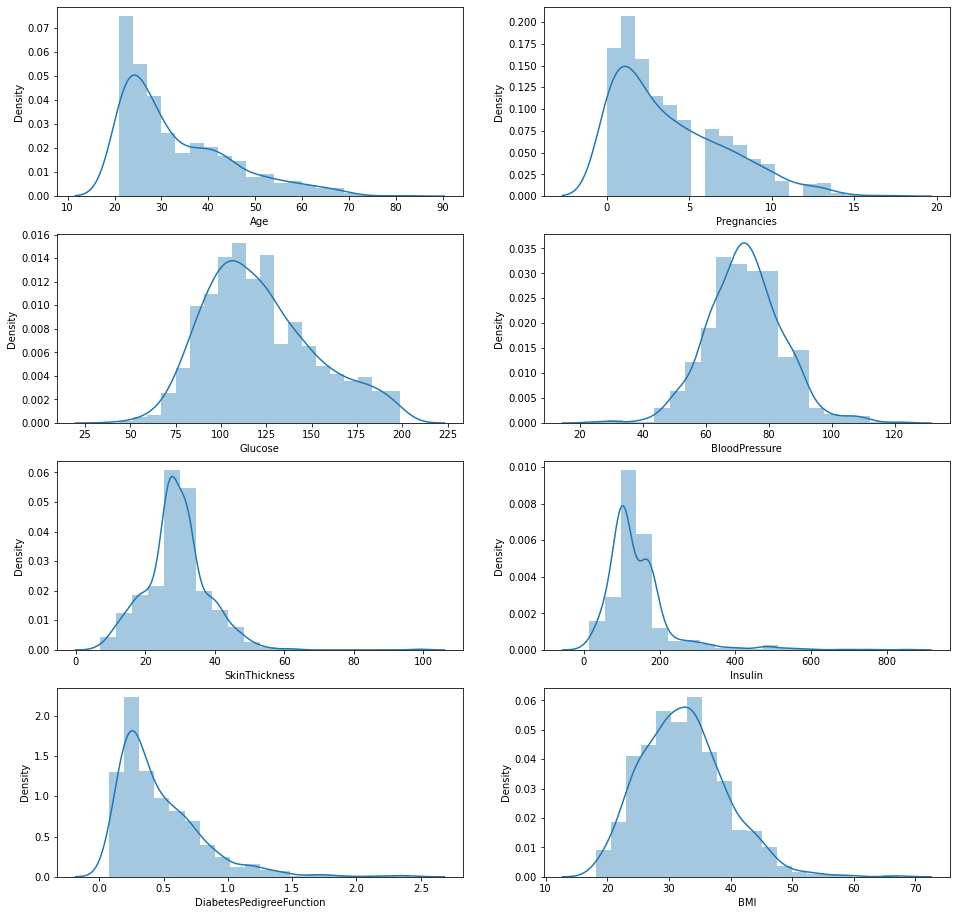

In [30]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.000000,17.00
Glucose,768.0,121.660735,30.514057,44.000,99.000000,117.0000,141.000000,199.00
BloodPressure,768.0,72.302727,12.203462,24.000,64.000000,72.0000,80.000000,122.00
SkinThickness,768.0,29.175460,9.438209,7.000,23.000000,29.0000,35.000000,99.00
Insulin,768.0,153.478510,98.042485,14.000,88.441566,130.0000,187.497941,846.00
BMI,768.0,32.416348,6.893284,18.200,27.500000,32.1500,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.0000,1.000000,1.00


In [33]:
df = dff

# Gaussian Naive Bayes

In [34]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [37]:
nb_model.predict(X_test)[0:10]

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])

In [38]:
nb_model.predict_proba(X_test)[0:10]

array([[8.17312135e-01, 1.82687865e-01],
       [9.43465740e-01, 5.65342605e-02],
       [9.91133820e-01, 8.86617962e-03],
       [8.85695180e-01, 1.14304820e-01],
       [4.21867402e-01, 5.78132598e-01],
       [4.95079630e-01, 5.04920370e-01],
       [9.99619384e-01, 3.80615954e-04],
       [5.63831812e-01, 4.36168188e-01],
       [5.68172035e-01, 4.31827965e-01],
       [1.61673303e-01, 8.38326697e-01]])

In [39]:
y_pred = nb_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [41]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7449275362318841

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       151
         1.0       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [43]:
nb_model.predict(X_train)[0:10]

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
nb_model.predict_proba(X_train)[0:10]

array([[0.99878969, 0.00121031],
       [0.32977054, 0.67022946],
       [0.25691031, 0.74308969],
       [0.91543168, 0.08456832],
       [0.9505656 , 0.0494344 ],
       [0.90413745, 0.09586255],
       [0.89610068, 0.10389932],
       [0.84410619, 0.15589381],
       [0.58844006, 0.41155994],
       [0.98732823, 0.01267177]])

In [45]:
x_pred = nb_model.predict(X_train)
accuracy_score(y_train, x_pred)

0.770949720670391

In [46]:
cross_val_score(nb_model, X_train, y_train, cv = 10).mean()

0.763382250174703

In [47]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       349
         1.0       0.69      0.63      0.66       188

    accuracy                           0.77       537
   macro avg       0.75      0.74      0.74       537
weighted avg       0.77      0.77      0.77       537



# KNN

## Model & Tahmin

In [48]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [49]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [50]:
y_pred = knn_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       151
         1.0       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



In [53]:
x_pred = knn_model.predict(X_train)

In [54]:
accuracy_score(y_train, x_pred)

0.8770949720670391

In [55]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       349
         1.0       0.84      0.81      0.82       188

    accuracy                           0.88       537
   macro avg       0.87      0.86      0.86       537
weighted avg       0.88      0.88      0.88       537



## Model Tuning

In [56]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [57]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [58]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.8100279524807826
En iyi parametreler: {'n_neighbors': 11}


In [59]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [60]:
knn_tuned.score(X_test, y_test)

0.7359307359307359

In [61]:
y_pred = knn_tuned.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       151
         1.0       0.60      0.69      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [64]:
x_pred = knn_tuned.predict(X_train)
accuracy_score(y_train, x_pred)

0.8342644320297952

In [65]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       349
         1.0       0.76      0.77      0.76       188

    accuracy                           0.83       537
   macro avg       0.82      0.82      0.82       537
weighted avg       0.83      0.83      0.83       537



# SVM

## Model & Tahmin

In [66]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [67]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [68]:
svm_model

SVC(kernel='linear')

In [69]:
y_pred = svm_model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.7705627705627706

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       151
         1.0       0.69      0.61      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [72]:
x_pred = svm_model.predict(X_train)

In [73]:
accuracy_score(y_train, x_pred)

0.7877094972067039

In [74]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       349
         1.0       0.73      0.62      0.67       188

    accuracy                           0.79       537
   macro avg       0.77      0.75      0.76       537
weighted avg       0.78      0.79      0.78       537



## Model Tuning

In [75]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [76]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 7}


In [77]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [78]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       151
         1.0       0.68      0.62      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [80]:
x_pred = svc_tuned.predict(X_train)
accuracy_score(y_train, x_pred)

0.7914338919925512

In [81]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       349
         1.0       0.74      0.62      0.67       188

    accuracy                           0.79       537
   macro avg       0.78      0.75      0.76       537
weighted avg       0.79      0.79      0.79       537



# RBF SVC

## Model & Tahmin

In [82]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [83]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [84]:
svc_model

SVC()

In [85]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       151
         1.0       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## Model Tuning

In [87]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [88]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [89]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1, 'gamma': 0.001}


In [90]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [91]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [92]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [95]:
rf_model

RandomForestClassifier()

In [96]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       151
         1.0       0.64      0.69      0.66        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



## Model Tuning

In [98]:
rf_model

RandomForestClassifier()

In [99]:
?rf_model

In [100]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [101]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [102]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [103]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [104]:
#final

In [105]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [106]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       151
         1.0       0.64      0.75      0.69        80

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231



In [108]:
x_pred = rf_tuned.predict(X_train)
accuracy_score(y_train, x_pred)


0.9683426443202979

In [109]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       349
         1.0       0.95      0.96      0.95       188

    accuracy                           0.97       537
   macro avg       0.96      0.97      0.97       537
weighted avg       0.97      0.97      0.97       537



In [110]:
Importance = pd.DataFrame({"Önem Düzeyi": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

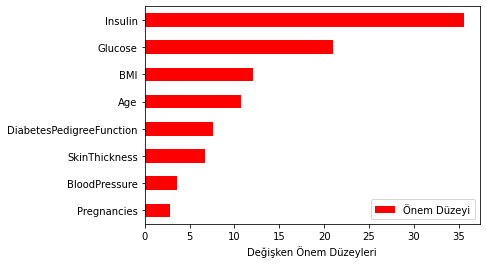

In [111]:
Importance.sort_values(by = "Önem Düzeyi", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [112]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [115]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [117]:
X_pred = gbm_model.predict(X_train)
accuracy_score(y_train, X_pred)

0.9497206703910615

In [118]:
print(classification_report(y_train, X_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       349
           1       0.97      0.88      0.92       188

    accuracy                           0.95       537
   macro avg       0.96      0.93      0.94       537
weighted avg       0.95      0.95      0.95       537



## Model Tuning

In [119]:
gbm_model

GradientBoostingClassifier()

In [120]:
?gbm_model

In [121]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [122]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [123]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [124]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [125]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [126]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [127]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [129]:
x_pred = gbm_tuned.predict(X_train)
accuracy_score(y_train, x_pred)

0.8957169459962756

In [130]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       349
           1       0.88      0.81      0.84       188

    accuracy                           0.90       537
   macro avg       0.89      0.88      0.88       537
weighted avg       0.90      0.90      0.89       537



# Tüm Modellerin Karşılaştırılması

In [131]:
modeller = [
    knn_tuned,
    svc_tuned,
    nb_model,
    rf_tuned,
    gbm_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 66.6667%
----------------------------
SVC:
Accuracy: 69.2641%
----------------------------
GaussianNB:
Accuracy: 69.6970%
----------------------------
RandomForestClassifier:
Accuracy: 73.5931%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%


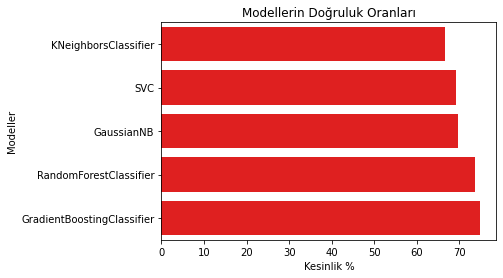

In [132]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Kesinlik %')
plt.title('Modellerin Doğruluk Oranları');    

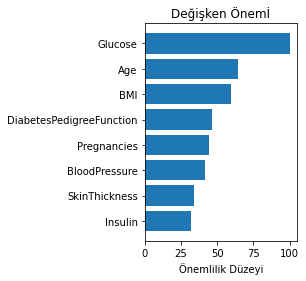

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

clf.fit(X_train, y_train)


feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Önemlilik Düzeyi')
plt.title('Değişken Önemİ')
plt.show()